<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/LATER_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best fit parameters (muR, deltaS): [8.2271541  2.74316033]
Negative log-likelihood: 2.458966359035327
Reciprocal RT mean (model): 2.9992
Reciprocal RT sigma (model): 0.3645
Data reciprocal RT mean: 2.9992
Data reciprocal RT std: 0.3645


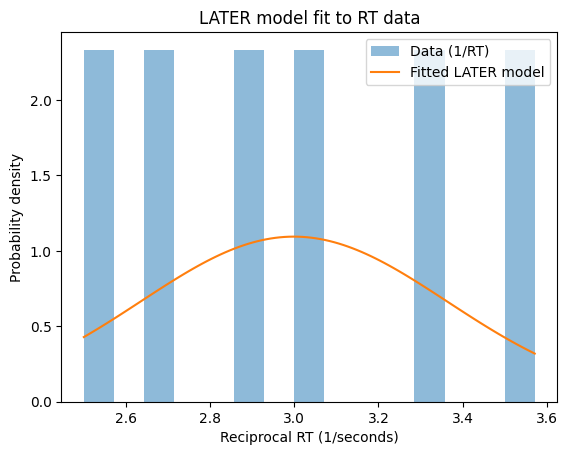

In [6]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import differential_evolution

# scipy.optimize.differential_evolution for global optimization, which is good
# for avoiding local minima.

# 1. Get the data
# Replace this with your actual data loading function.
# For example: RTs = later_getData()
# Here, I'll just simulate some RT data for demonstration.
# RTs = later_getData([], [], 0.2)  # You will replace this line.
RTs = np.array([0.3, 0.35, 0.28, 0.4, 0.33, 0.37])  # example RT data (in seconds)

# 2. Define the objective function
# The LATER model says 1/RT ~ Normal(mu, sigma)
# where mu = muR / deltaS and sigma = 1 / deltaS
# fits = [muR, deltaS]

def later_err_fcn(fits):
    muR, deltaS = fits
    if deltaS <= 0 or muR <= 0:
        # Parameters must be positive; penalize invalid values
        return np.inf

    mu = muR / deltaS
    sigma = 1 / deltaS

    # Calculate the negative log likelihood of the data under the model
    # 1/RT is normally distributed
    inv_rts = 1 / RTs
    log_likelihoods = norm.logpdf(inv_rts, loc=mu, scale=sigma)
    nll = -np.sum(log_likelihoods)
    return nll

# 3. Define initial conditions and bounds
lower_bounds = [0.001, 0.001]
upper_bounds = [1000, 1000]

# initial guess for [muR, deltaS] - choose empirically or use mean reciprocal RT and std
mean_inv_rt = np.mean(1 / RTs)
std_inv_rt = np.std(1 / RTs)
initial_guess = [mean_inv_rt * std_inv_rt, 1 / std_inv_rt]  # heuristic guess

# 4. Run the fits using differential evolution (global optimization)
result = differential_evolution(later_err_fcn, bounds=list(zip(lower_bounds, upper_bounds)),
                                maxiter=3000, polish=True)

fits = result.x
nllk = result.fun

print(f"Best fit parameters (muR, deltaS): {fits}")
print(f"Negative log-likelihood: {nllk}")

# 5. Evaluate the fits
# You can visually inspect or check summary stats, e.g.:
print(f"Reciprocal RT mean (model): {fits[0]/fits[1]:.4f}")
print(f"Reciprocal RT sigma (model): {1/fits[1]:.4f}")
print(f"Data reciprocal RT mean: {mean_inv_rt:.4f}")
print(f"Data reciprocal RT std: {std_inv_rt:.4f}")

# Optionally, plot the model vs data histogram for visual check (requires matplotlib)
import matplotlib.pyplot as plt

inv_rts = 1 / RTs
plt.hist(inv_rts, bins=15, density=True, alpha=0.5, label='Data (1/RT)')
x = np.linspace(min(inv_rts), max(inv_rts), 100)
plt.plot(x, norm.pdf(x, loc=fits[0]/fits[1], scale=1/fits[1]), label='Fitted LATER model')
plt.legend()
plt.xlabel('Reciprocal RT (1/seconds)')
plt.ylabel('Probability density')
plt.title('LATER model fit to RT data')
plt.show()
